In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


Logistic regression is a classification algorithm used to assign observations to a discrete set of classes.

Some of the examples of classification problems are Email spam or not spam, Online transactions Fraud or not Fraud,

Tumor Malignant or Benign. Logistic regression transforms its output using the logistic sigmoid function to return a probability value.

What are the types of logistic regression

Binary (eg. Tumor Malignant or Benign)

Multi-linear functions failsClass (eg. Cats, dogs or Sheep's)

Logistic Regression

Logistic Regression is a Machine Learning algorithm which is used for the classification problems, it is a predictive analysis algorithm and based on the concept of probability.

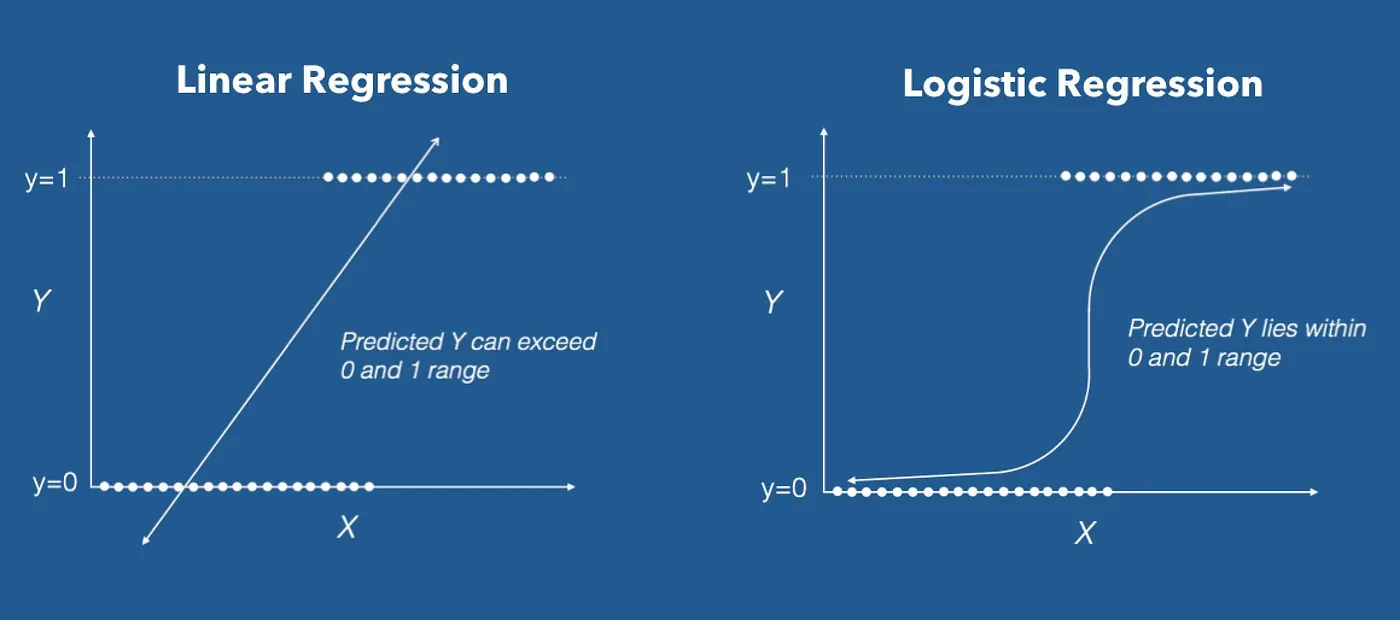

The hypothesis of logistic regression tends it to limit the cost function between 0 and 1.

 Therefore linear functions fail to represent it as it can have a value greater than 1 or less than 0 
 
 which is not possible as per the hypothesis of logistic regression.

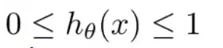

What is the Sigmoid Function?

In order to map predicted values to probabilities, we use the Sigmoid function. 

The function maps any real value into another value between 0 and 1. In machine learning, we use sigmoid to map predictions to probabilities.

![alt text](1_OUOB_YF41M-O4GgZH_F2rw.webp)

![alt text](1_l59BUnPwWHMf1H-GNxgZHQ.webp)

The Hypothesis of logistic regression

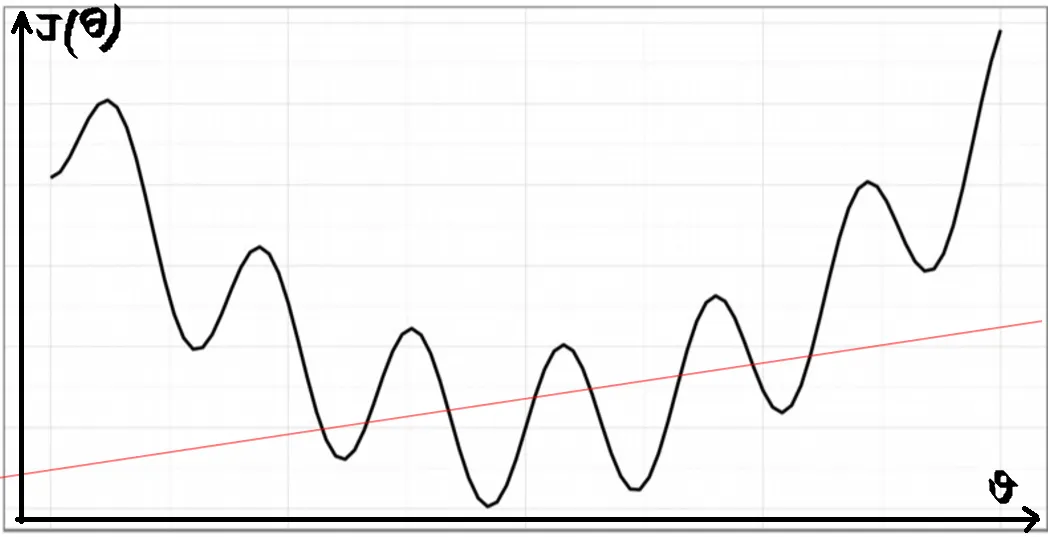

![alt text](1_2g14OVjyJqio2zXwJxgj2w.webp)

Cost function of Logistic Regression

![alt text](1_gAsyT-YdsQZUMF81NTZQdQ.webp) ![alt text](1_2QLAi8r4BWFZ4AC6aQLzbA.webp)

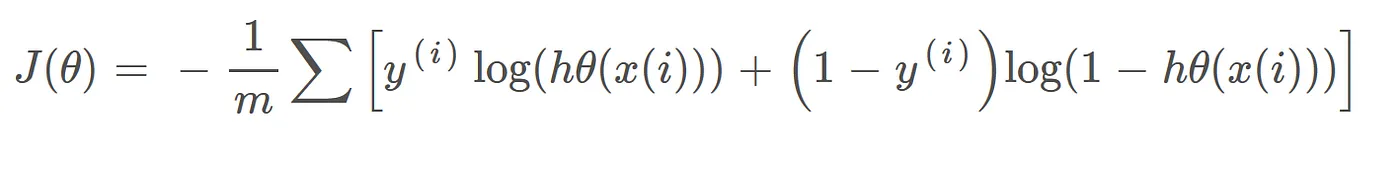

Gradient Descent

![alt text](1_Ecea3jVIRxK4Mkrh_Nie4w.webp)

In [2]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn import metrics
%matplotlib inline

In [3]:
digits=load_digits()
digits.data.shape


(1797, 64)

In [4]:
digits.target.shape

(1797,)

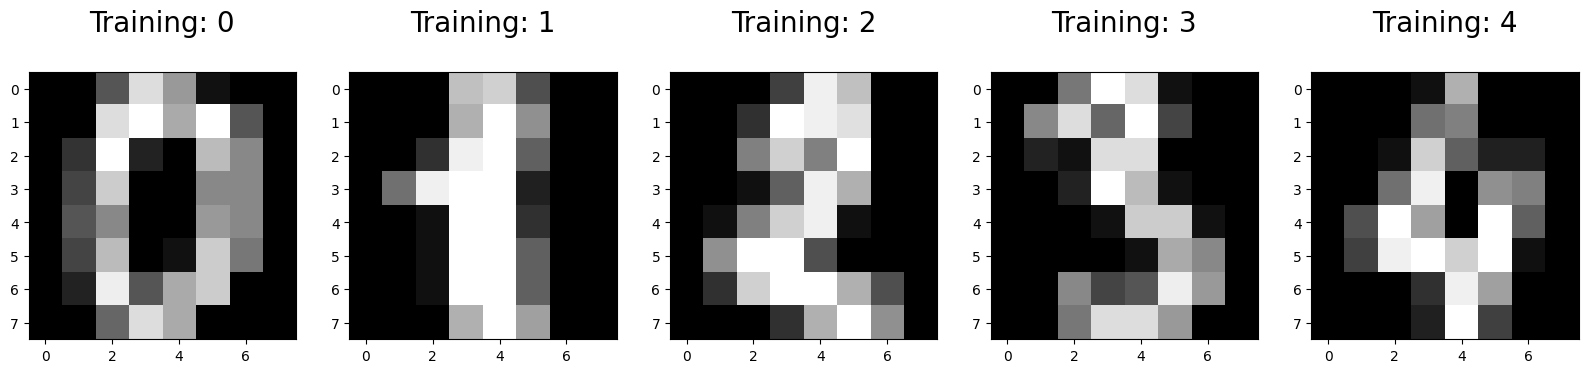

In [5]:
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(digits.data[0:5],digits.target[0:5])):
    plt.subplot(1,5,index+1)
    plt.imshow(np.reshape(image,(8,8)),cmap=plt.cm.gray)
    plt.title('Training: %i\n'% label,fontsize=20)

Splitting data into training and test sets

In [6]:
x_train,x_test,y_train,y_test=train_test_split(digits.data,digits.target,test_size=0.25,random_state=0)


In [7]:
print(x_train.shape)

(1347, 64)


In [8]:
print(x_test.shape)

(450, 64)


In [9]:
print(y_train.shape)

(1347,)


In [10]:
print(y_test.shape)

(450,)


Scikit-Learn 4-Step-Modeling Pattern

Step 1: import the model u want to use

IN sklearn all the ML models are implemented as python classes

In [11]:
from sklearn.linear_model import LogisticRegression


Step2:Make an instance of the Model

In [12]:
logisticreg=LogisticRegression(max_iter=2000)

Step3:Training the model on the data,storing the information learned from the data

MOdel is learning the relationship between x(data) and y(labels)

In [13]:
logisticreg.fit(x_train,y_train)


LogisticRegression(max_iter=2000)

Step_4:Predict the labels of the new data

uses the information learned during the training process

In [14]:
#returns a numpy ndarray
#predict for one observation
logisticreg.predict(x_test[0].reshape(1,-1))

array([2])

In [15]:
#predict for multiple instances at once
logisticreg.predict(x_test[0:10])

array([2, 8, 2, 6, 6, 7, 1, 9, 8, 5])

In [16]:
#make prediction on the entire dataset
prediction=logisticreg.predict(x_test)

In [17]:
prediction.shape

(450,)

Measuring Model Performance

accuracy(fraction of correct prediction):correct prediction/ total number of data points

In [18]:
#use score method for accuracy
score=logisticreg.score(x_test,y_test)
print(score)

0.9533333333333334


Confusion Matrix (Matplotlib)

A confusion matrix is a used to describe the performance of a classification model on a set of test data for which true value is known

In [19]:
def plot_confusion_matrix(cm,title='Confusion matrix',cmap='Pastel1'):
    plt.figure(figsize=(9,9))
    plt.imshow(cm,interpolation='nearest',cmap=cmap)
    plt.title(title,size=15)
    plt.colorbar()
    tick_marks=np.arange(10)
    plt.xticks(tick_marks,['0','1','2','3','4','5','6','7','8','9'],rotation=45,size=10)
    plt.yticks(tick_marks,['0','1','2','3','4','5','6','7','8','9'],size=10)
    plt.tight_layout()
    plt.ylabel('Actual label',size=15)
    plt.xlabel('Predicted label',size=15)
    width,height=cm.shape
    
    for x in range(width):
        for y in range(height):
            plt.annotate(str(cm[x][y]),xy=(y,x),
                         horizontalalignment='center',
                         verticalalignment='center')
            
        



Confusion Matrix
[[37  0  0  0  0  0  0  0  0  0]
 [ 0 40  0  0  0  0  0  0  2  1]
 [ 0  0 41  3  0  0  0  0  0  0]
 [ 0  0  0 44  0  0  0  0  1  0]
 [ 0  0  0  0 37  0  0  1  0  0]
 [ 0  0  0  0  0 46  0  0  0  2]
 [ 0  1  0  0  0  0 51  0  0  0]
 [ 0  0  0  1  1  0  0 46  0  0]
 [ 0  3  1  0  0  0  1  0 43  0]
 [ 0  0  0  0  0  1  0  0  2 44]]


<Figure size 640x480 with 0 Axes>

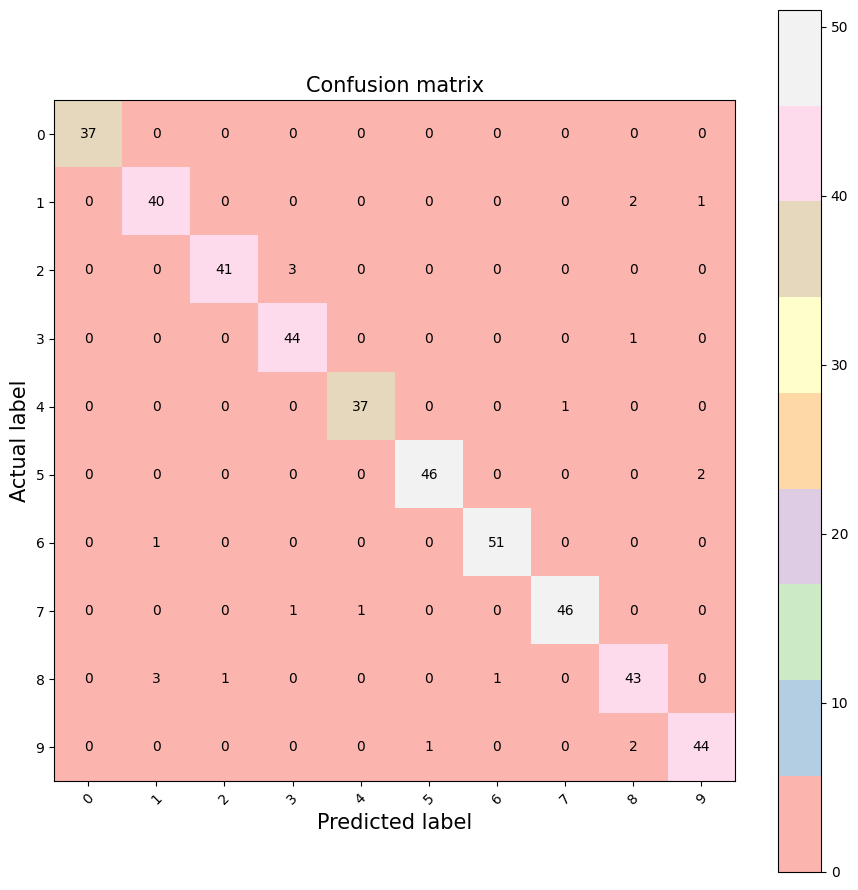

In [20]:
#confusion matrix
confusion=metrics.confusion_matrix(y_test,prediction)
print("Confusion Matrix")
print(confusion)
plt.figure()
plot_confusion_matrix(confusion)
plt.show()

Text(0.5, 1.0, 'Accuracy Score: 0.9533333333333334')

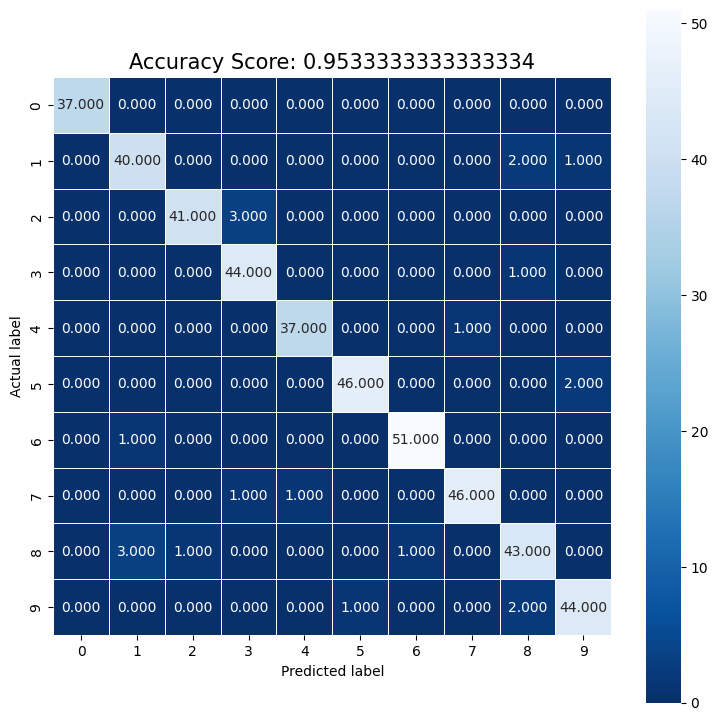

In [21]:
plt.figure(figsize=(9,9))
sns.heatmap(confusion, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15)

Showing the Images and Labels (MNIST)

In [22]:
index=0
misclassifiedindex=[]
for predict,actual in zip(prediction,y_test):
    if predict!=actual:
        misclassifiedindex.append(index)
    index+=1

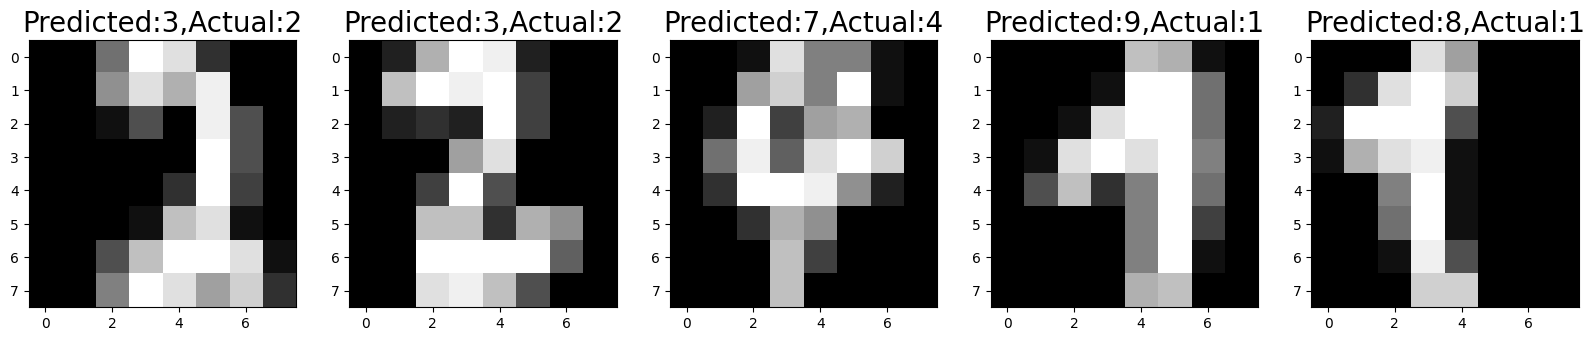

In [23]:
plt.figure(figsize=(20,4))
for plotindex,wrong in enumerate(misclassifiedindex[10:15]):
    plt.subplot(1,5,plotindex+1)
    plt.imshow(np.reshape(x_test[wrong],(8,8)),cmap=plt.cm.gray)
    plt.title('Predicted:{},Actual:{}'.format(prediction[wrong],y_test[wrong]),fontsize=20)

Logistic Regression From Scratch

In [72]:
# 1. Create Dataset
X, y = make_blobs(n_samples = 1000, n_features = 2, centers=2, random_state=0) # basically you can make your regression/classification dataset through such methods. It is one of them 
dataset_array = np.concatenate((X, y.reshape(-1,1)), axis=1)

# 2. Create a Dataframe of the array
dataset_df = pd.DataFrame(dataset_array, columns = ['Col 1', 'Col 2', 'Target'])

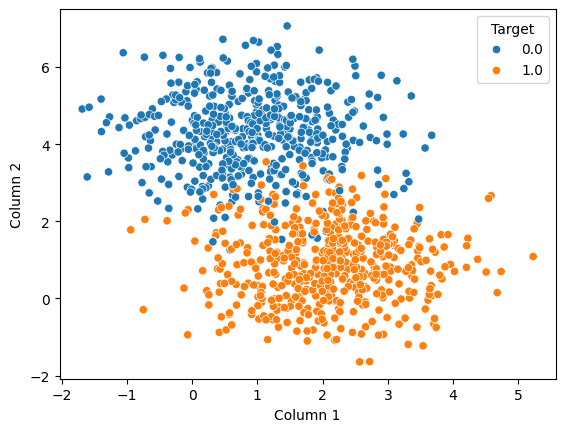

In [73]:
sns.scatterplot(data=dataset_df, x='Col 1', y='Col 2', hue='Target')
plt.xlabel("Column 1")
plt.ylabel("Column 2")
plt.show()


In [106]:
# Build a logistic regression classifier

# 0. Helper function: Sigmoid
def sigmoid(x):
    
    '''
    sigmoid(x) = 1 / (1 + e^(-x))
    '''
    return 1 / (1 + np.exp(-x))

# 1. Hypothesis
def hypothesis(x, theta):
    
    # h(x) = sigmoid(X.theta)
    z = np.dot(X, theta)
    
    return sigmoid(z)
# 2. Loss Function: Binary Cross Entropy
# to get better idea try to print all of these by adding print statement in the function itself
def binary_cross_entropy(x, y, theta): # Usually we consider binary_cross_entropy as loss function(NOT ALWAYS) for binary classification
    
    m, n = x.shape 
    # print(x.shape)
    # a. Compute the hypothesis
    y_hat = hypothesis(x, theta)
    # print(y_hat)
    # b. Compute the Binary Cross Entropy
    loss = y * np.log(y_hat) + (1 - y) * np.log(1 - y_hat)
    # print(np.log(y_hat))
    
    # print(np.log(1 - y_hat))
    # print( np.mean(loss) )
    return - np.mean(loss) 
# 3. Compute the gradient
def gradient(x, y, theta):
    
    # Compute hypothesis
    y_hat = hypothesis(x, theta)
    
    # Compute gradient
    grad = np.dot( x.T, (y - y_hat))
    
    return - grad / x.shape[0] 

# 4. Gradient Descent
def gradient_descent(x, y, n_iter = 1, alpha = 0.0001): # Try to mingle with n_iter and alpha to see what happens when you change them
    
    # a. Randomly initialise theta
    m,n = x.shape
    theta = np.zeros(shape = (n, ))
    
    # List to store the error
    error = []
    
    # b. Perform the gradient descent
    for i in range(n_iter):
        '''
        y_hat = hypothesis(x, theta)
        print(y_hat, y_hat.shape)
        '''
        
        # b.1. Compute the loss
        loss = binary_cross_entropy(x, y, theta)
        error.append(loss)
        
        # b.2. Compute Gradient
        grad = gradient(x, y, theta)
        
        # b.3. Perform the update rule
        theta = theta - alpha * grad
        
    return theta, error


In [80]:
# 1. Add constant
dataset_df_copy = dataset_df.copy() 
dataset_df_copy.insert(0, 'Constant', np.ones(shape=(dataset_df_copy.shape[0], 1)))

In [107]:
X = dataset_df_copy.drop('Target', axis=1)
y = dataset_df_copy['Target']

theta, error = gradient_descent(X, y, 10000)

In [108]:
print(theta)
print('*************************')
print(error[-1]) # last error

[ 0.07936606  0.310348   -0.39525566]
*************************
0.40484399905434004


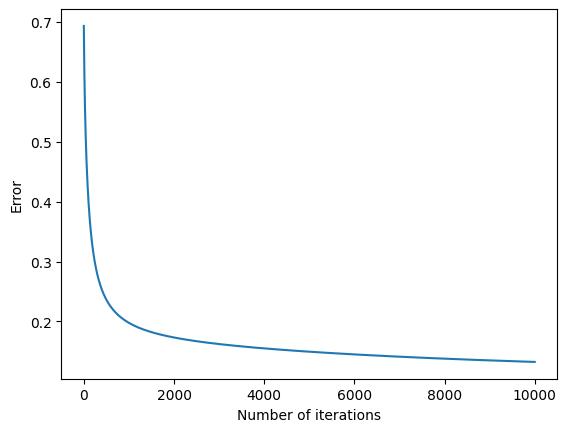

In [92]:
plt.plot(error)
plt.xlabel("Number of iterations")
plt.ylabel("Error")
plt.show()

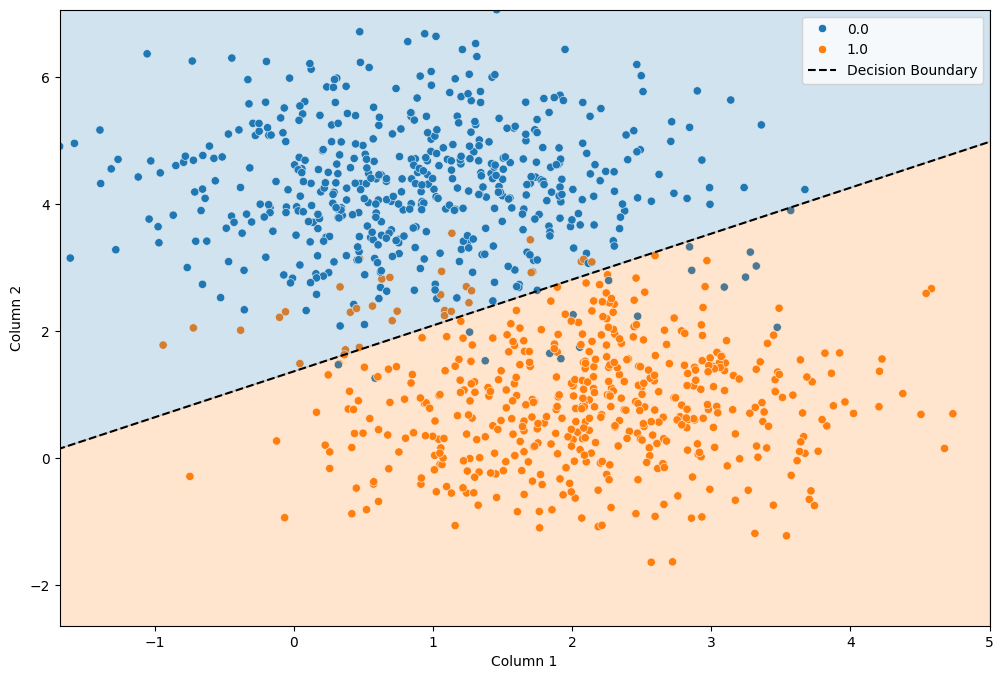

In [78]:
# plot the dataset along with the deicision boundary


# Create Decision Boundary
x2_max, x2_min = X['Col 2'].max(), X['Col 2'].min()
x1_max, x1_min = X['Col 1'].max(), X['Col 1'].min()

x_vals = np.array([-2, 5])
slope = - theta[1] / theta[2]
intercept = - theta[0] / theta[2]
decision_boundary = slope * x_vals + intercept

# Plot the dataset with decision bounddart
plt.figure(figsize=(12,8))
sns.scatterplot(data=dataset_df, x='Col 1', y='Col 2', hue='Target')
plt.plot(x_vals, decision_boundary, linestyle='--', color='black', label='Decision Boundary')
plt.fill_between(x_vals, decision_boundary, x2_min-10, color='tab:orange', alpha=0.2)
plt.fill_between(x_vals, decision_boundary, x2_max+10, color='tab:blue', alpha=0.2)
plt.xlabel("Column 1")
plt.ylabel("Column 2")
plt.ylim(x2_min-1, x2_max)
plt.xlim(x1_min, 5)
plt.legend(loc='best')
plt.show()

Comparing the results with Scikit Learn's Logistic Regression

In [102]:
# Import logistic regression
from sklearn.linear_model import LogisticRegression

# Build the model
lr = LogisticRegression()
lr.fit(X.drop('Constant', axis=1), y)

# Compute coeffecients
theta_sklearn = lr.coef_
intercept_sklearn = lr.intercept_

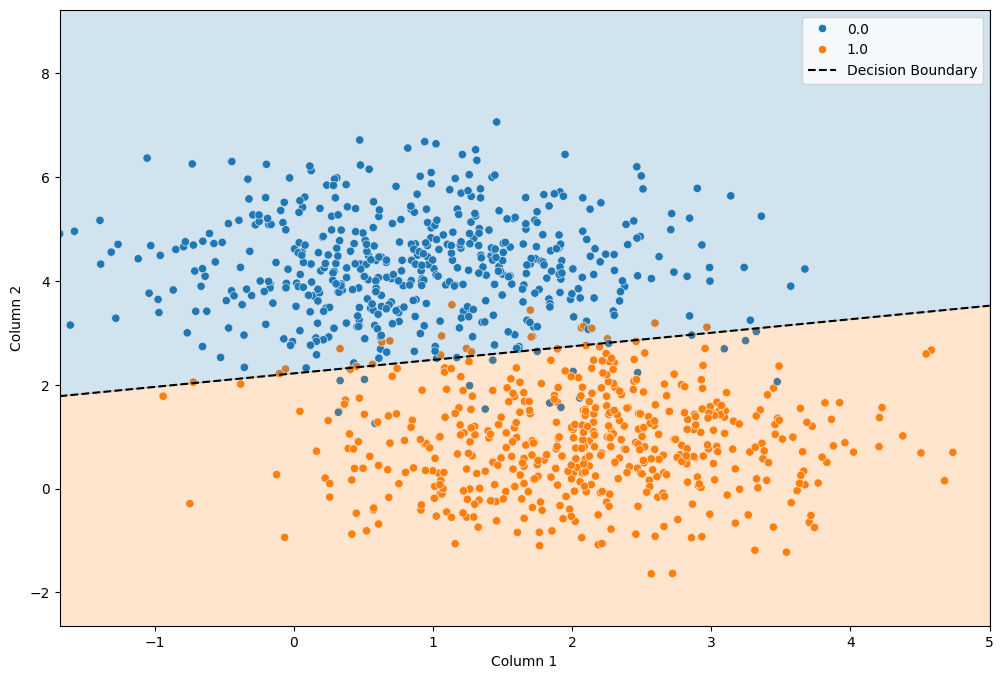

In [103]:
# Plot the Decision Boundary
# plot the dataset along with the deicision boundary

# Create Decision Boundary
x2_max, x2_min = X['Col 2'].max(), X['Col 2'].min()
x1_max, x1_min = X['Col 1'].max(), X['Col 1'].min()

x_vals = np.array([-2, 5])
slope = - theta_sklearn[0][0] / theta_sklearn[0][1]
intercept = - intercept_sklearn / theta_sklearn[0][1]
decision_boundary = slope * x_vals + intercept

# Plot the dataset with decision bounddart
plt.figure(figsize=(12,8))
sns.scatterplot(data=dataset_df, x='Col 1', y='Col 2', hue='Target')
plt.plot(x_vals, decision_boundary, linestyle='--', color='black', label='Decision Boundary')
plt.fill_between(x_vals, decision_boundary, x2_min-10, color='tab:orange', alpha=0.2)
plt.fill_between(x_vals, decision_boundary, x2_max+10, color='tab:blue', alpha=0.2)
plt.xlabel("Column 1")
plt.ylabel("Column 2")
plt.ylim(x2_min-1, x1_max+4)
plt.xlim(x1_min, 5)
plt.legend(loc='best')
plt.show()

In [109]:
# Print the Custom Logisit Regression's results
print("Weights of variable given out by custom Logistic Regression")
print("Col 1: {}".format(theta[1]))
print("Col 2: {}".format(theta[2]))
print("Intercept : {}".format(theta[0]))
print()

print("Weights of variable given out by Sklearn's Logistic Regression")
print("Col 1: {}".format(theta_sklearn[0][0]))
print("Col 2: {}".format(theta_sklearn[0][1]))
print("Intercept : {}".format(intercept_sklearn[0]))

Weights of variable given out by custom Logistic Regression
Col 1: 0.31034800391266554
Col 2: -0.39525566209451135
Intercept : 0.07936606417840547

Weights of variable given out by Sklearn's Logistic Regression
Col 1: 0.7803648552218095
Col 2: -2.991922435330147
Intercept : 6.638932396680608


In [105]:
# Compute accuracy for both the models

# 1. Custom Logistic Regression
predictions_1 = np.round(hypothesis(X.drop('Constant', axis=1), theta))
acc1 = np.sum(predictions_1 == y) / len(y) * 100

# 2. Sklearn's Logistic Regression
predictions_2 = lr.predict(X.drop('Constant', axis=1))
acc2 = np.sum(predictions_2 == y) / len(y) * 100

print("Accuracy of custom Logistic Regression Classifier: {}%".format(acc1))
print("Accuracy of sklearn's Logistic Regression Classifier: {}%".format(acc2))

Accuracy of custom Logistic Regression Classifier: 95.7%
Accuracy of sklearn's Logistic Regression Classifier: 95.7%
